In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
for dirpath, dirname, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirpath, filename))


/kaggle/input/sign-language-digits-dataset/X.npy
/kaggle/input/sign-language-digits-dataset/Y.npy
/kaggle/input/sign-language-digits-dataset/Sign-language-digits-dataset/X.npy
/kaggle/input/sign-language-digits-dataset/Sign-language-digits-dataset/Y.npy


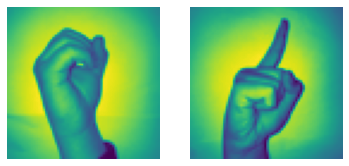

In [2]:
x_l = np.load('../input/sign-language-digits-dataset/X.npy')
y_l = np.load('../input/sign-language-digits-dataset/Y.npy')
plt.subplot(1,2,1)
plt.axis('off')
plt.imshow(x_l[270].reshape(64,64))
plt.subplot(1,2,2)
plt.axis('off')
plt.imshow(x_l[825].reshape(64,64))

In [3]:
# Concatenate 0s and 1s array for only 2 signs dataset
X = np.concatenate((x_l[204:409],x_l[822:1027]),axis=0)
z = np.zeros((205,1))
o = np.ones((205,1))
Y = np.concatenate((z,o),axis=0).reshape(X.shape[0],1)
print(X.shape)
print(Y.shape)

(410, 64, 64)
(410, 1)


In [4]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15,random_state=42)
print(X_train.shape[0],X_test.shape[0])

348 62


In [5]:
# flatten X_train and X_test arrays to 2D to feed as input 
X_train_flatten = X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
X_test_flatten = X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])
print(X_train_flatten.shape,'\n',X_test_flatten.shape)

(348, 4096) 
 (62, 4096)


In [6]:
# take transpose (to feed as input features into NN)
x_train = X_train_flatten.T
y_train = Y_train.T
x_test = X_test_flatten.T
y_test = Y_test.T
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(4096, 348) (4096, 62) (1, 348) (1, 62)


In [7]:
# Create function to initialize weights (4096,1) and bias
def initialize_w_and_b(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w,b

In [8]:
w,b = initialize_w_and_b(4096)
#z = np.dot(w.T,x_train)+b
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

In [9]:
# loss function for logistic regression = -y*log(activations) - (1-y)*log(1-activations)
def forward_prop(w,b,x_train,y_train):
    z = np.dot(w.T,x_train)+b
    a = sigmoid(z)
    loss = -y_train*np.log(a) - (1-y_train)*np.log(1-a)
    cost = (np.sum(loss))/x_train.shape[1]
    return cost

In [10]:
# combining forward and backward prop 
def forward_and_back_prop(x_train,y_train,w,b):
    #forwardprop
    z = np.dot(w.T,x_train)+b
    a = sigmoid(z)
    loss = -y_train*np.log(a) - (1-y_train)*np.log(1-a)
    cost = (np.sum(loss))/x_train.shape[1]
    #backprop
    d_w = (np.dot(x_train,(a-y_train).T))/x_train.shape[1]
    d_b = np.sum(a-y_train)/x_train.shape[1]
    gradients = {'d_w':d_w,'d_b':d_b}
    return cost,gradients


In [11]:
# updation/learning of parameters

def update(w,b,x_train,y_train,iterations,alpha=0.03):
    cost_list = []
    cost_list_every_100_iter = []
    index = []
    for i in range(iterations):
        cost,gradients = forward_and_back_prop(x_train,y_train,w,b)
        cost_list.append(cost)
        #update weights and bias
        w = w - alpha*gradients['d_w']
        b = b - alpha*gradients['d_b']
        if i%100==0:
            cost_list_every_100_iter.append(cost)
            index.append(i)
            print('cost after iteration {}:{}'.format(i,cost))
    parameters = {'weights':w,'bias':b}
    plt.plot(index,cost_list_every_100_iter)
    plt.xticks(index,rotation='vertical')
    plt.xlabel('iterations')
    plt.ylabel('cost')
    plt.show()
    return parameters,gradients,cost_list
#parameters,gradients,cost_list = update(w,b,x_train,y_train,iterations=200,alpha=0.01)


In [12]:
#predictions using x_test
def predict(w,b,x_test):
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_pred = np.zeros((1,x_test.shape[1]))
    for i in range(z.shape[1]):
        if z[0,i]<=0.5:
            Y_pred[0,i] = 0
        elif z[0,i]>0.5:
            Y_pred[0,i] = 1
    return Y_pred
# predict(parameters['weights'],parameters['bias'],x_test)

cost after iteration 0:14.014222401929988
cost after iteration 100:2.088499064791322
cost after iteration 200:0.1447652033845121
cost after iteration 300:0.09911447375339084
cost after iteration 400:0.0778384317196438
cost after iteration 500:0.06478384259322215
cost after iteration 600:0.055551608017774166
cost after iteration 700:0.04861906446249134
cost after iteration 800:0.04324691807796044
cost after iteration 900:0.038984849235931096
cost after iteration 1000:0.03553380054675086
cost after iteration 1100:0.03268884155309165


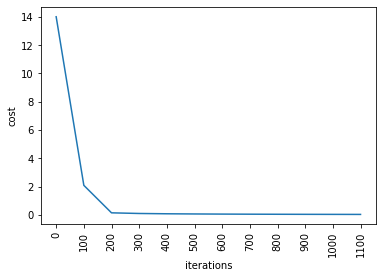

train accuracy: 99.71264367816092 %
test acccuracy: 95.16129032258064 %


In [13]:
def logistic_regression(x_train,y_train,x_test,y_test,alpha,iterations):
    dimension = x_train.shape[0]
    w,b = initialize_w_and_b(dimension)
    parameters, gradients, cost_list = update(w, b, x_train, y_train, iterations,alpha)
    
    y_pred_test = predict(parameters['weights'],parameters['bias'],x_test)
    y_pred_train = predict(parameters["weights"],parameters["bias"],x_train)
    
    # accuracy %
    print('train accuracy: {} %'.format(100 - np.mean(np.abs(y_pred_train-y_train))*100))
    print('test acccuracy: {} %'.format(100 - np.mean(np.abs(y_pred_test-y_test))*100))
    w1,b1 = parameters['weights'],parameters['bias'] 
    return w1,b1
w1,b1 = logistic_regression(x_train,y_train,x_test,y_test,alpha=0.03,iterations=1200) 

[0.99992646]
sign shown is 1


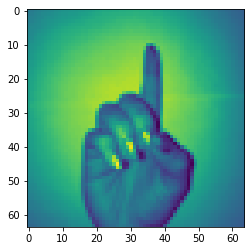

In [14]:
#prediction on any image from the dataset 
plt.imshow(X_train[328].reshape(64,64)) # any number between 0 and 348 
sample = X_train[328].reshape(-1) # change here as well
sample.shape
z = sigmoid(np.dot(w1.T,sample)+b1)
print(z)
if z>0.5:
    print('sign shown is 1')
elif z<=0.5:
    print('sign shown is 0')

In [15]:
#same using sklearn linear_model

from sklearn import linear_model
logistic_regression = linear_model.LogisticRegression(random_state=42,max_iter=2000)
Y_train = Y_train.ravel()
Y_test = Y_test.ravel()
train_score = logistic_regression.fit(X_train_flatten,Y_train).score(X_train_flatten,Y_train)
test_score = logistic_regression.fit(X_train_flatten,Y_train).score(X_test_flatten,Y_test)
print('train accuracy: {} %'.format(train_score))
print('test accuracy: {} %'.format(test_score))

train accuracy: 1.0 %
test accuracy: 0.967741935483871 %
